In [28]:
import cv2
img = cv2.imread("Image5\input.jpg")

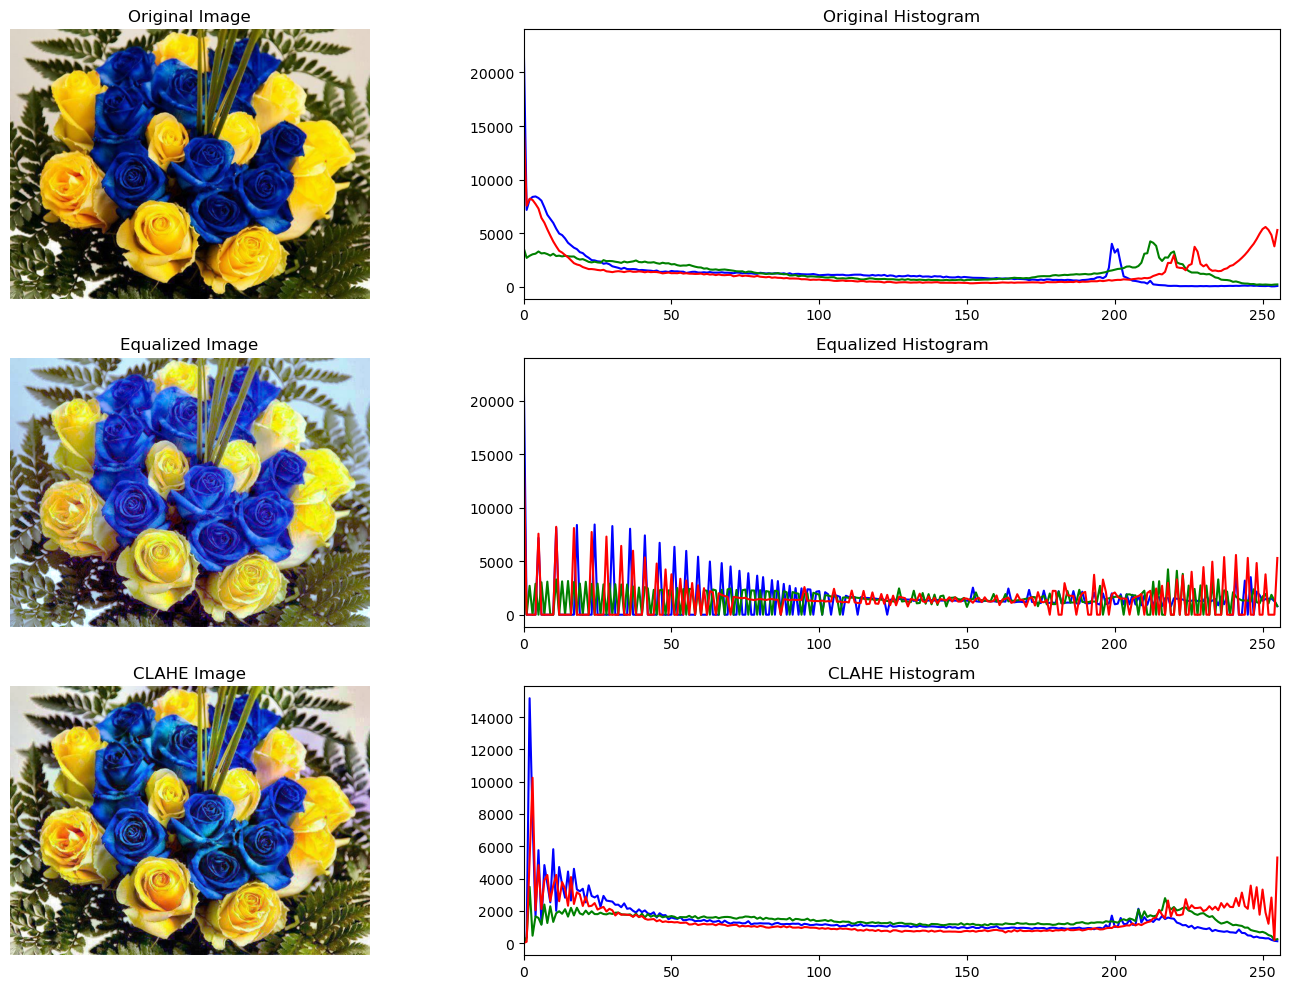

In [29]:
#Contrast Limited Adaptive Histogram Equalization (CLAHE)
#The x-axis in a CLAHE (Contrast Limited Adaptive Histogram Equalization) histogram represents the pixel intensity levels of an image. These intensity levels typically range from 0 to 255
#The y-axis in a histogram represents the frequency or the number of pixels that have specific intensity values.
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(img, title):
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title(title)

def equalize_hist_color(img):
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))
    return cv2.merge(eq_channels)

def apply_clahe(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(clahe.apply(ch))
    return cv2.merge(eq_channels)

def main():    
    # Color histogram equalization
    eq_color_img = equalize_hist_color(img)
    
    # CLAHE on color image
    clahe_img = apply_clahe(img)
    
    # Plotting
    plt.figure(figsize=(15, 10))
    
    # Original Image
    plt.subplot(3, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Original Histogram
    plt.subplot(3, 2, 2)
    plot_histogram(img, 'Original Histogram')
    
    # Equalized Image
    plt.subplot(3, 2, 3)
    plt.imshow(cv2.cvtColor(eq_color_img, cv2.COLOR_BGR2RGB))
    plt.title('Equalized Image')
    plt.axis('off')
    
    # Equalized Histogram
    plt.subplot(3, 2, 4)
    plot_histogram(eq_color_img, 'Equalized Histogram')
    
    # CLAHE Image
    plt.subplot(3, 2, 5)
    plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))
    plt.title('CLAHE Image')
    plt.axis('off')
    
    # CLAHE Histogram
    plt.subplot(3, 2, 6)
    plot_histogram(clahe_img, 'CLAHE Histogram')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


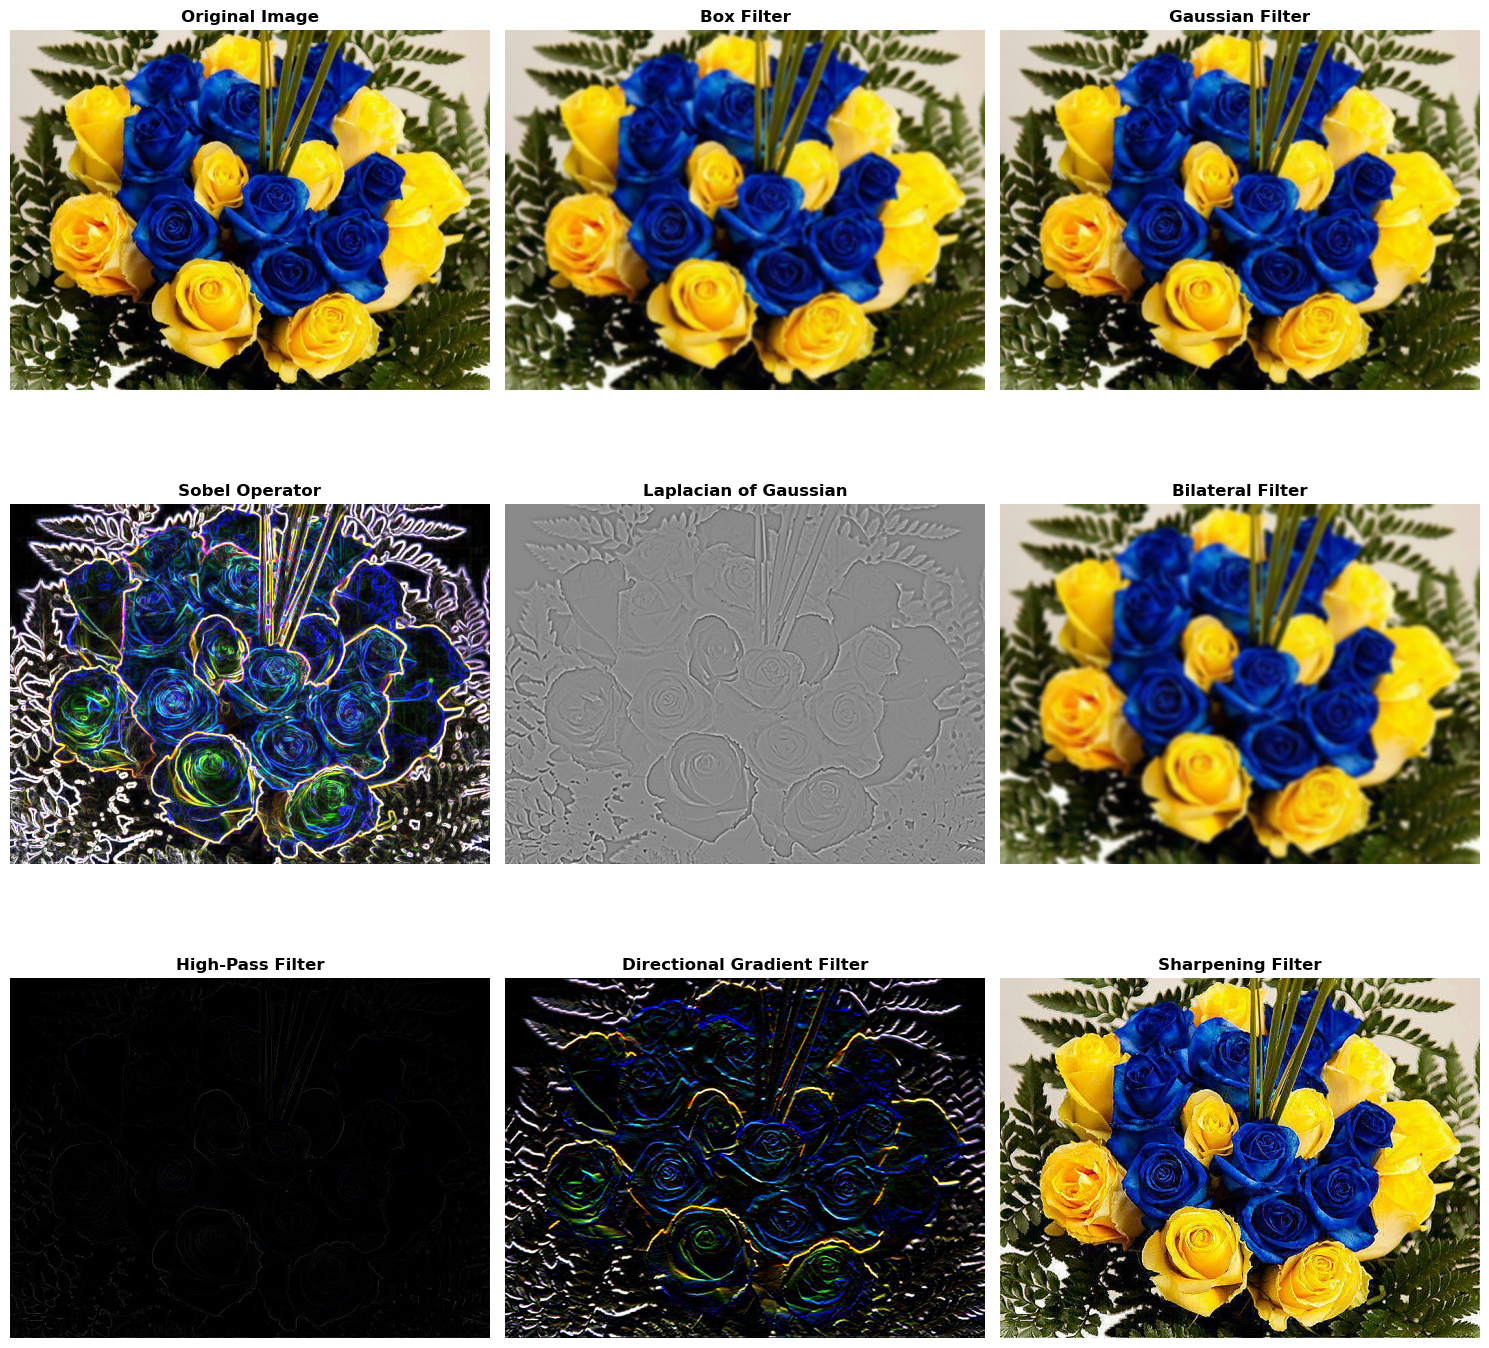

In [30]:
def normalize_image(image):
    """Normalize the image to a range [0, 1] using min-max normalization."""
    norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image

def apply_box_filter(image, kernel_size=(5, 5)):
    """Apply a box filter for smoothing, a type of low-pass filter that reduces noise and details."""
    return cv2.blur(image, kernel_size)

def apply_gaussian_filter(image, kernel_size=5, sigmaX=0):
    """Apply Gaussian filter for smoothing, effective for Gaussian noise, using a Gaussian kernel."""
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigmaX)

def apply_sobel_operator(image, ksize=3):
    """Apply Sobel operator, a gradient-based high-pass filter, useful for edge detection."""
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    sobel = cv2.magnitude(grad_x, grad_y)
    return np.clip(sobel, 0, 1)  # Ensuring the result stays within the range [0, 1]

def apply_laplacian_of_gaussian(image):
    """Apply Laplacian of Gaussian (LoG), a band-pass filter for edge detection combining Gaussian blur and Laplacian."""
    if image.dtype != np.float32:
        image = image.astype(np.float32)
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_32F)
    laplacian_normalized = cv2.normalize(laplacian, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return laplacian_normalized

def apply_bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):
    """Apply bilateral filter, an edge-preserving smoothing filter, reducing noise while maintaining edges."""
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

def apply_high_pass_filter(image, alpha=1.5):
    """Apply high-pass filter to enhance high-frequency components, sharpening the image."""
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    high_pass = cv2.addWeighted(image, alpha, blurred, -alpha, 0)
    return np.clip(high_pass, 0, 1)

def apply_directional_gradient_filter(image, direction='horizontal'):
    """Apply a directional gradient filter to emphasize edges in a specified direction (horizontal or vertical)."""
    kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32) if direction == 'horizontal' else np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    return cv2.filter2D(image, -1, kernel)

def apply_sharpening_filter(image):
    """Apply a sharpening filter to enhance edges and fine details in the image."""
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    return cv2.filter2D(image, -1, kernel)

# Load and normalize the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
normalized_image = normalize_image(img)

# Apply filters
box_filtered = apply_box_filter(normalized_image)
gaussian_filtered = apply_gaussian_filter(normalized_image)
sobel_filtered = apply_sobel_operator(normalized_image)
laplacian_of_gaussian_filtered = apply_laplacian_of_gaussian(normalized_image)
bilateral_filtered = apply_bilateral_filter(normalized_image)
high_pass_filtered = apply_high_pass_filter(normalized_image)
directional_gradient_filtered = apply_directional_gradient_filter(normalized_image, 'horizontal')
sharpened_image = apply_sharpening_filter(normalized_image)

# Visualization
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
titles = ['Original Image', 'Box Filter', 'Gaussian Filter', 'Sobel Operator', 'Laplacian of Gaussian', 'Bilateral Filter', 'High-Pass Filter', 'Directional Gradient Filter', 'Sharpening Filter']
images = [img, box_filtered, gaussian_filtered, sobel_filtered, laplacian_of_gaussian_filtered, bilateral_filtered, high_pass_filtered, directional_gradient_filtered, sharpened_image]

for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
    ax.set_title(titles[i], fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

END